In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
date = session.query(measurement, measurement.date).order_by(measurement.date.desc()).limit(1)
date[0][1]

'2017-08-23'

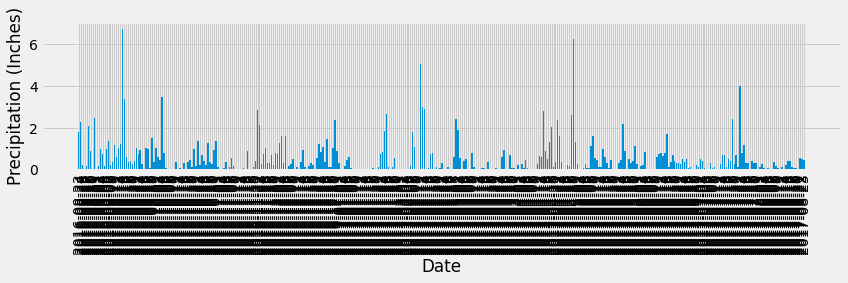

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = date[0][1]

# Calculate the date one year from the last date in data set.
one_year_date = dt.date(2017, 8 ,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= one_year_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(query)
df = df.rename({0:"date", 1:"prcp"}, axis = 1)
df.set_index("date", inplace = True)

# Sort the dataframe by date
df = df.sort_index() 

# Use Pandas Plotting with Matplotlib to plot the data
fig,axes = plt.subplots(1,1)
fig.set_size_inches(12, 4)
axes.bar(df.index, df['prcp'])
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(func.count(station.id)).all()
station_count

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.id)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(measurement.station, func.count(measurement.id)).\
                        group_by(measurement.station).\
                        order_by(func.count(measurement.id).desc()).limit(1)[0][0]
session.query(measurement.station).\
    filter(measurement.station == most_active_station).\
    with_entities(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

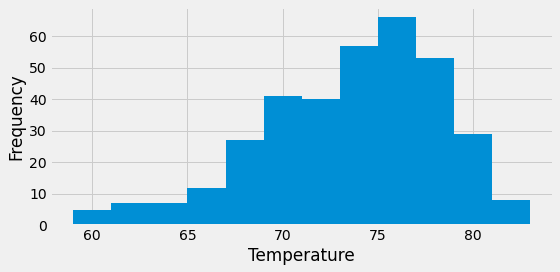

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(measurement.tobs).\
            filter(measurement.station == most_active_station).\
            filter(measurement.date >= one_year_date).all()
df = pd.DataFrame(temps)
fig,axes = plt.subplots(1,1)
fig.set_size_inches(8, 4)
axes.hist(df[0], bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# Close session

In [ ]:
# Close Session
session.close()